## Notation
$$\newcommand{\suchthat}{\mathop{:}}
\newcommand{\card}[1]{\left\vert #1 \right\vert}$$
Fix a distance metric and compute the \emph{pairwise distance matrix}, $$\mathbf \Delta := [\delta_{ij}]$$ 
where  $\delta_{ij}$ is the distance from $\vec \xi_i$ to $\vec \xi_j$. Similarly, downstairs we compute $\mathbf D := [d_{ij}]$ where $d_{ij}$ is the distance from $\vec x_i$ to $\vec x_j$. 

### Rank, Neighborhoods, Rank Measures
We can use these distances to compute *ranks*. Defined the rank of $\vec \xi_j$ with respect to $\vec \xi_i$ as

$$
\rho_{ij} := \card{\{ k \suchthat \delta_{ik} < \delta_{ij} \text{ or } (\delta_{ik} = \delta_{ij} \text{ and } 1 \le k < j \le N)\}}
$$

Similarly, downstairs:

$$
r_{ij} := \card{\{ k \suchthat d_{ik} < d_{ij} \text{ or } (d_{ik} = d_{ij} \text{ and }  1 \le k < j \le N)\}}
$$


Observe that with this definition, reflexive ranks are zero and ranks are unique.

We define the *nonreflexive $K$-ary neighborhood* of $\vec \xi_i$ and $\vec x_i$ as

$$
\nu_i^K := \{j \suchthat 1 \le \rho_{ij} \le K\}
$$

and 

$$
n_i^K := \{j \suchthat 1 \le r_{ij} \le K\}
$$

respectively.

## Trustworthiness


Let $U_i^K := n_i^K \setminus \nu_i^K$, $V_i^K := \nu_i^K \setminus n_i^K$ 

$$\begin{align}M_T(K) & :=  1 - \frac 2 {G_K} \sum_{i=1}^N \sum_{j \in U_i^K} (\rho_{ij} - K) \\ 
  & =  1 - \frac 2 {G_K} \sum_{(k, \ell) \in \mathbf{LL}_K} (k-K)q_{k\ell} \end{align}$$
  
where
$$G_K := \begin{cases}
NK(2N-3K-1) & \text{ if } K < N/2 \\
N(N-K)(N-K-1) &  \text{ if } K \ge N/2
\end{cases}$$

In [1]:
import numpy as np

from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, TSNE, LocallyLinearEmbedding

from umap import UMAP
import src
import src.data.datasets as datasets
from src.visualization.plotting import two_dim_multiplot, embeddable_image
import src.quality_measures as qm
import src.embedding_io as e_io
from src.paths import processed_data_path

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set(style='white', rc={'figure.figsize':(12,8)})

import logging

LOG_FORMAT = "%(levelname)s %(asctime)s - %(message)s"
DATE_FORMAT = "%m/%d/%Y %I:%M:%S %p"

logging.basicConfig(format=LOG_FORMAT, datefmt=DATE_FORMAT, level=logging.INFO) 
logger = logging.getLogger()

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
## Your choice of dataset
dataset = datasets.load_dataset('coil-20')
dataset_name = 'COIL-20'
metric = 'euclidean'

high_data = dataset.data
labels = dataset.target

print(dataset.DESCR)

Columbia University Image Library (COIL-20)

Notes
-----
Data Set Characteristics:
    :Number of Instances: 1440
    :Number of Attributes: 49152
    :Attribute Information: 128x128 8-bit greyscale (PGM) image
    :Missing Attribute Values: None
    :Creator: Sameer A Nene, Shree K. Nayar and Hiroshi Murase
    :Date: 1995

This is a copy of the Columbia Object Image Library [COIL-20] data:
http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-20/coil-20-proc.tar.gz

This dataset consists of 1,440 greyscale images of 20 objects (72 images per object) where the objects
have been placed on a motorized turntable against a black background. Images were taken at 5 degree rotations,
giving 72 images per object. The resulting images were then size and intensity-normalized.

Size normalization involved first clipping to a rectangual bounding box and resized (with aspect
ratio preserved) to 128x128 using interpolation-decimation filters to minimize aliasing [Oppenheim and Schafe

In [4]:
low_dimension = 2
random_state = 6502

In [5]:
algorithms = {'PCA' : PCA(n_components=low_dimension, svd_solver='arpack'),
              'MDS' : MDS(n_components=low_dimension, metric=True),
              'tSNE' : TSNE(n_components=low_dimension),
              'Isomap' : Isomap(n_components=low_dimension),
              'UMAP' : UMAP(n_components=low_dimension, metric=metric, random_state=random_state),
              'LLE' : LocallyLinearEmbedding(n_components=low_dimension, random_state=random_state)
             }

In [6]:
# location to save data
if not processed_data_path.exists():
    os.makedirs(processed_data_path)

In [7]:
low_data = {}
metadata = {}
for name, algorithm in algorithms.items():
    logger.info(f"Starting {name}")
    basefilename = "_".join([name, dataset_name.replace(' ', '-')])
    low_data[name], _, metadata[name] = e_io.create_embedding(basefilename, data=high_data, 
                                                              algorithm_object=algorithms[name], 
                                                              labels=labels, algorithm_name=name,
                                                              dataset_name=dataset_name,
                                                              data_path=processed_data_path)

INFO 07/13/2018 01:22:23 PM - Starting PCA
INFO 07/13/2018 01:22:23 PM - Existing metatdata file PCA_COIL-20_0.metadata found.
INFO 07/13/2018 01:22:23 PM - Desired embedding already exists. Loading from file...
INFO 07/13/2018 01:22:24 PM - Reading embedding PCA_COIL-20_0.embedding.npy
INFO 07/13/2018 01:22:24 PM - Starting MDS
INFO 07/13/2018 01:22:24 PM - Existing metatdata file MDS_COIL-20_0.metadata found.
INFO 07/13/2018 01:22:24 PM - Desired embedding already exists. Loading from file...
INFO 07/13/2018 01:22:24 PM - Reading embedding MDS_COIL-20_0.embedding.npy
INFO 07/13/2018 01:22:24 PM - Starting tSNE
INFO 07/13/2018 01:22:24 PM - Existing metatdata file tSNE_COIL-20_0.metadata found.
INFO 07/13/2018 01:22:24 PM - Desired embedding already exists. Loading from file...
INFO 07/13/2018 01:22:24 PM - Reading embedding tSNE_COIL-20_0.embedding.npy
INFO 07/13/2018 01:22:24 PM - Starting Isomap
INFO 07/13/2018 01:22:24 PM - Existing metatdata file Isomap_COIL-20_0.metadata found.


## Get pairwise distance matrices and rank matrices

In [8]:
high_distances = pairwise_distances(high_data, metric=metric)

In [9]:
high_rank = np.zeros((high_distances.shape[0], high_distances.shape[1]), dtype='int32')
for i, row in enumerate(high_distances):
    high_rank[i] = np.argsort(np.argsort(row))
(high_rank == qm.rank_matrix(high_distances)).all()

True

In [10]:
%%time
low_distances_dict = {}
for name, data in low_data.items():
    _, low_distances, _ = qm.pairwise_distance_differences(high_distances=high_distances,
                                                           low_data=data, metric=metric)
    low_distances_dict[name] = low_distances

CPU times: user 253 ms, sys: 580 ms, total: 833 ms
Wall time: 242 ms


In [11]:
low_rank_dict = {}

for name in algorithms.keys():
    low_rank_dict[name] = qm.rank_matrix(low_distances_dict[name])

### Nonreflexive K-ary neighborhoods

In [12]:
test_hd = np.array([[0, 1, 5, 3],
                    [1, 0 , 3, 5],
                    [5, 3, 0, 1],
                    [3, 5, 1, 0]])
test_ld = np.array([[0, 1, 2, 3],
                    [1, 0 , 1, 2],
                    [2, 1, 0, 1],
                    [3, 2, 1, 0]])

In [13]:
test_rank_hd = qm.rank_matrix(test_hd)
test_rank_hd

array([[0, 1, 3, 2],
       [1, 0, 2, 3],
       [3, 2, 0, 1],
       [2, 3, 1, 0]], dtype=int32)

In [14]:
test_rank_ld = qm.rank_matrix(test_ld)
test_rank_ld

array([[0, 1, 2, 3],
       [1, 0, 2, 3],
       [3, 1, 0, 2],
       [3, 2, 1, 0]], dtype=int32)

We define the *nonreflexive $K$-ary neighborhood* of $\vec \xi_i$ and $\vec x_i$ as

$$
\nu_i^K := \{j \suchthat 1 \le \rho_{ij} \le K\}
$$

and 

$$
n_i^K := \{j \suchthat 1 \le r_{ij} \le K\}
$$

respectively.

In [21]:
test_K = 2
test_knn_hd = qm.rank_to_knn(test_rank_hd, n_neighbors=2)
test_knn_ld = qm.rank_to_knn(test_rank_ld, n_neighbors=2)

In [22]:
K = 12
high_knn = []
for row in high_rank:
    high_knn.append(np.where(row <= K)[0])

In [23]:
test_high_knn = qm.rank_to_knn(high_rank, n_neighbors=K)

In [24]:
for i, element in enumerate(high_knn):
    assert((test_high_knn[i] == element).all())

In [25]:
low_knn_dict = {}
for name in algorithms.keys():
    low_knn_dict[name] = qm.rank_to_knn(low_rank_dict[name], n_neighbors=K)

In [26]:
low_knn_dict[name][:10]

array([[ 0, 20, 25, 26, 29, 30, 37, 43, 48, 56, 57, 58, 65],
       [ 1,  2,  6,  8, 10, 38, 40, 45, 49, 55, 59, 62, 64],
       [ 1,  2,  8, 23, 40, 41, 45, 47, 49, 50, 59, 62, 64],
       [ 2,  3,  5,  7, 16, 21, 23, 34, 41, 44, 47, 50, 70],
       [ 4, 16, 17, 18, 19, 22, 28, 39, 42, 44, 61, 70, 71],
       [ 3,  5,  7, 16, 19, 21, 22, 23, 34, 41, 44, 47, 70],
       [ 1,  6, 10, 12, 20, 29, 30, 37, 38, 48, 55, 57, 65],
       [ 2,  3,  5,  7, 16, 21, 23, 34, 41, 44, 47, 50, 70],
       [ 1,  2,  6,  8, 10, 38, 40, 45, 49, 55, 59, 62, 64],
       [ 9, 11, 24, 31, 33, 36, 52, 54, 60, 63, 66, 68, 69]])

## Trustworthiness

$U_i^K := n_i^K \setminus \nu_i^K$, $V_i^K := \nu_i^K \setminus n_i^K$ 

$$M_T(K)  :=  1 - \frac 2 {G_K} \sum_{i=1}^N \sum_{j \in U_i^K} (\rho_{ij} - K)$$

where
$$G_K := \begin{cases}
NK(2N-3K-1) & \text{ if } K < N/2 \\
N(N-K)(N-K-1) &  \text{ if } K \ge N/2
\end{cases}$$

In [27]:
trust_hood = []
for i, low in enumerate(low_knn_dict['PCA']):
    trust_hood.append(set(low).difference(set(high_knn[i])))

In [28]:
G_K = qm._trustworthiness_normalizating_factor(K, high_rank.shape[0])

In [29]:
point_scores = []
for i, indices in enumerate(trust_hood):
    score = 0
    for j in indices:
        score += (high_rank[i, j] - K) * 2 / G_K
        #print(i, j, high_rank[i, j])
    point_scores.append(score)

In [31]:
(point_scores == qm._knn_to_point_trustworthiness(np.array(high_knn), low_knn_dict['PCA'], K, high_rank=high_rank)).all()

True

In [36]:
1 - sum(point_scores)

0.8901770593139745

In [35]:
1 - sum(point_scores) == qm.trustworthiness(high_data=high_data, low_data=low_data['PCA'], n_neighbors=K)

True

In [37]:
qm.trustworthiness(point_scores=point_scores)

0.8901770593139745

## Now do it for all of the data

In [39]:
K = 19
point_score = {}
total_score = {}
for name in algorithms.keys():
    point_score[name] = qm.point_trustworthiness(high_data=high_data, low_data=low_data[name], n_neighbors=K)
    total_score[name] = qm.trustworthiness(point_scores=point_score[name])

In [40]:
score="Trustworthiness"

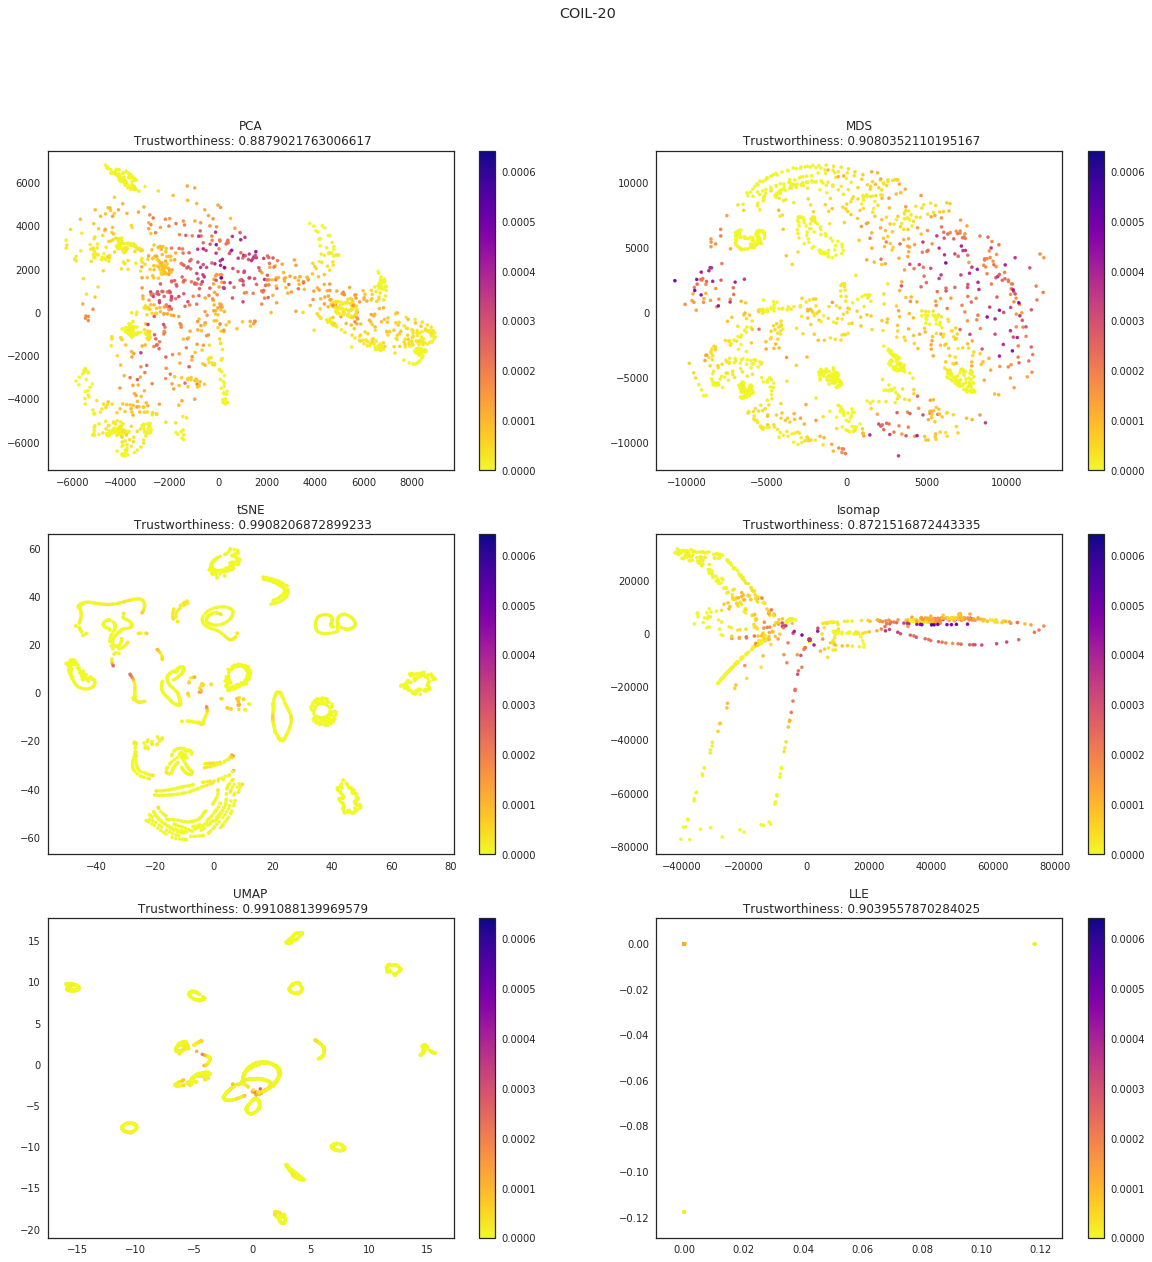

In [41]:
data = []
labels_list = []
titles = []

for k, v in low_data.items():
    data.append(v)
    titles.append(f"{k}\n {score}: {total_score[k]}")
    labels_list.append(point_score[k])
    
sns.set(style='white', rc={'figure.figsize':(20,20)})

two_dim_multiplot(data, labels_list, titles, ncols=2, cmap="plasma_r", s=10, share_cbar=True)
plt.suptitle(dataset_name);

In [42]:
filepath = processed_data_path / dataset_name / 'png'

In [43]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource, output_notebook
from bokeh.models import LinearColorMapper, LabelSet
import matplotlib as mpl
#output_notebook()
name = 'UMAP'
output_file("toolbar.html")
trust = point_score[name]
colors = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 255*mpl.cm.plasma_r(mpl.colors.Normalize()(trust))
]
source_data = dict(
    x=low_data[name][:,0],
    y=low_data[name][:,1],
    color=colors,
    point_score=trust,
    label=labels,
    imgs=[embeddable_image(file) for file in filepath.iterdir()]
)

#promote our data frame to a ColumnDataSource for bokeh
source = ColumnDataSource(data=source_data)

# Might have to change this if you have more than 20 categories
# which of the 20 Categorical palette's to use (they vary from length 1 to length 20)
# palette = d3['Category20b'][20]
# color_map = CategoricalColorMapper(factors=source_data['label'].unique(), palette=palette)


TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="42" alt="@imgs" width="42"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 15px; font-weight: bold;">Label</span>
            <span style="font-size: 12px; color: #966;">[@label]</span>
        </div>
        <div>
            <span style="font-size: 15px; font-weight: bold;">Point Score</span>
            <span style="font-size: 12px; color: #966;">[@point_score]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #696;">($x, $y)</span>
        </div>
    </div>
"""

p = figure(plot_width=1200, plot_height=800, tooltips=TOOLTIPS,
           title="Coil 20 Exploration")

#If you want colors to work with circle you must use radius and NOT size
p.scatter('x', 'y', 
         line_alpha=0.1,
         fill_alpha=1,
         size=6,
         fill_color='color',
         source=source
        )
show(p)

INFO 07/13/2018 01:29:42 PM - Session output file 'toolbar.html' already exists, will be overwritten.
